<a href="https://colab.research.google.com/github/moreirarodrigo-eo/Project_NSF/blob/main/Data_analysis_EMATER_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install geopandas -q
import geopandas as gpd
import matplotlib.pyplot as plt
!pip install contextily -q
import contextily as ctx
import xyzservices.providers as xyz
import matplotlib.pyplot as plt

!pip install pysal -q

import libpysal
import geopandas
import mapclassify
import matplotlib.pyplot as plt

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_US/EMATER_data/EMATER_DATA_June_2022_clip.gpkg').to_crs(epsg=4326).drop(columns = ["Unnamed: 0.1", 'Unnamed: 0'])
gdf_RO = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_US/EMATER_data/RO/11UFE250GC_SIR.shp').to_crs(epsg=4326)
gdf_surveyed_lots = gpd.read_file('/content/drive/MyDrive/PROJETOS/Project_NCF_burn_exports/Surveyed_Lots_NewIDs_Export.shp').to_crs(epsg=4326)

print(gdf.ACTIVITIES.unique().tolist())
print(gdf.INDICATORS.unique().tolist())

['Bovino Leiteiro', 'Mandioca', 'Urucum', 'Café Conillon Clonal', 'Banana', 'Soja', 'Abacaxi', 'Cacau', 'Laranja', 'Inhame', 'Maracujá', 'Coco', 'Arroz', 'Café Seminal', 'Melancia']
['Produção Diária do Rebanho (média Litros/ dia)', 'Área de Pastagem com atividade Leiteira (ha)', 'Área Colhida (ha)', 'Produção ( t )', 'Área Plantada (ha)', 'Produção (sc)', 'Produção (frutos)', 'Produção Obtida (Kg)']


In [ ]:
gdf = gpd.clip(gdf, gdf_surveyed_lots)


In [ ]:
# fig, ax = plt.subplots(figsize=(15,15))
# gdf.plot(ax=ax, alpha=0.5, color='white', markersize = 0.1)
# gdf_RO.boundary.plot(ax = ax,  color='black', linewidth = 0.5)
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source = ctx.providers.Esri.WorldImagery)
# plt.show()

# **Plot the spatial distribution**

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


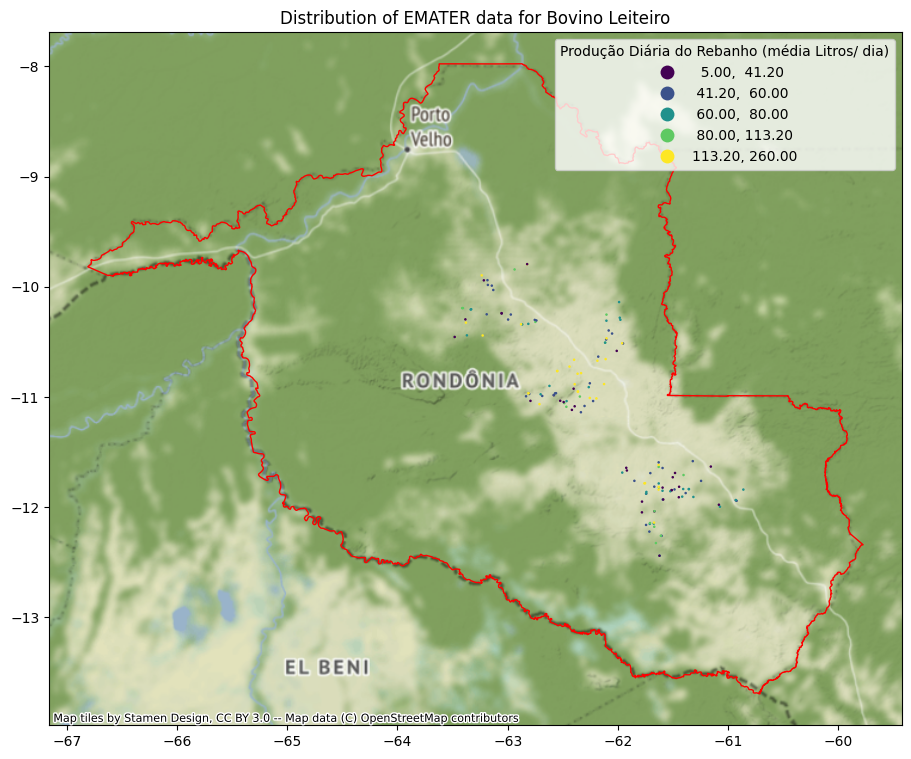

In [ ]:

variable_name = 'Bovino Leiteiro'
indicator = 'Produção Diária do Rebanho (média Litros/ dia)'

gdf_subset = gdf[(gdf['ACTIVITIES'] == variable_name) & (gdf['INDICATORS'] == indicator)]

gdf_subset['DATA'] = gdf_subset['DATA'].astype(float)
gdf_subset.to_file('EMATER_DATA_June_2022_clip_bovino_leiteiro.gpkg', driver='GPKG')

n_bins = 5

ax = gdf_subset.plot(column="DATA", scheme="Quantiles", k=n_bins, figsize=(16, 9), markersize=0.7, legend=True)
gdf_RO.boundary.plot(ax=ax, color="red", linewidth=1)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
legend = ax.get_legend()
legend.set_title(indicator)
plt.title("Distribution of EMATER data for "+ variable_name)
plt.show()

# **Plot the distribution**

              DATA
count  6997.000000
mean     78.189600
std      63.108514
min       5.000000
25%      40.000000
50%      60.000000
75%     100.000000
max     885.000000


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'Produção Diária do Rebanho (média Litros/ dia)')

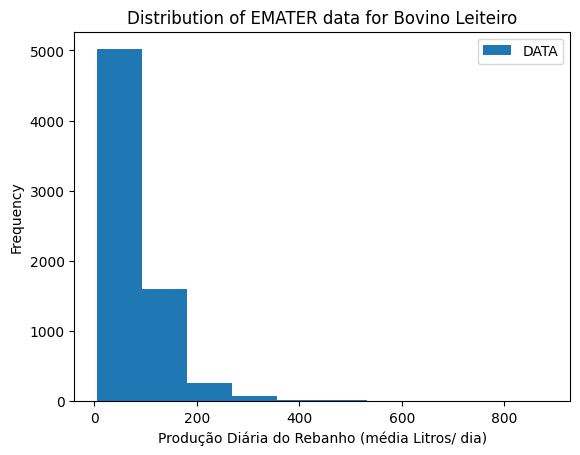

In [ ]:
variable_name = 'Bovino Leiteiro'
indicator = 'Produção Diária do Rebanho (média Litros/ dia)'

gdf_subset_hist = gdf[(gdf['ACTIVITIES'] == variable_name) & (gdf['INDICATORS'] == indicator)]
gdf_subset_hist['DATA'] = gdf_subset_hist['DATA'].astype(float)
print(gdf_subset_hist.describe())
gdf_subset_hist.plot(column = 'DATA', kind = 'hist')
plt.title("Distribution of EMATER data for "+ variable_name)
plt.xlabel(indicator)